## Part 2:  2-layer neural network

Coding a more complex framework, such as the 2-layer framework in this example, can be done from scratch but there are many useful frameworks that make the process easier. In this section I am using PyTorch because it's pretty simple to use and understand, plus it has the features I need for the implementation:

Clearly explain what the following resources are in pytorch and why they are needed for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)


Tensors:
    Tensors are multi-dimensional arrays that are fundamental building blocks in PyTorch. They are similar to NumPy arrays but with additional features and can more easily generalize beyond 2D (see link). They are used for representing the input data, parameters (weights and biases), and intermediate computations in neural networks. In a 2-layer neural network, tensors will be used to store input data, weights, biases, and intermediate activations during forward and backward propagation. In PyTorch, gradients are automatically computed and stored for tensors upon which operations requiring gradients are performed.

    Helpful for my inital understanding: https://www.kdnuggets.com/2018/05/wtf-tensor.html

Dynamic computation graphs:

    PyTorch uses dynamic computation graphs, where the graph is generated on-the-fly as operations are performed on tensors. TensorFlow uses static computation graphs so clearly I picked well with PyTorch. In 2-layer neural networks, the dynamic computation graph tracks the operations performed during forward and backward propagation.

    More on these from a great ai stack exchange post: https://ai.stackexchange.com/questions/3801/what-is-a-dynamic-computational-graph


PyTorch also conveniently has relu (a kind of activation function) and sigmoid built in.



!!!!! Label these links with what they are and what you used them for, get at least one more
Introduction to tensors and what they are

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch



#### Exploratory data analysis

In [24]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('hour.csv')

Data source: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday(1) or not(0) (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week (0-6) (sunday-saturday)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [26]:
# viewing the first few rows of the data
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
# Confirm data is clean (it is)
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


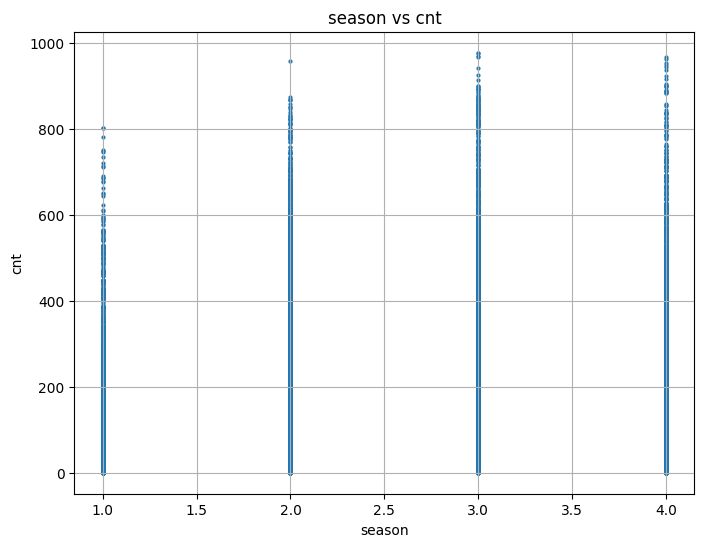

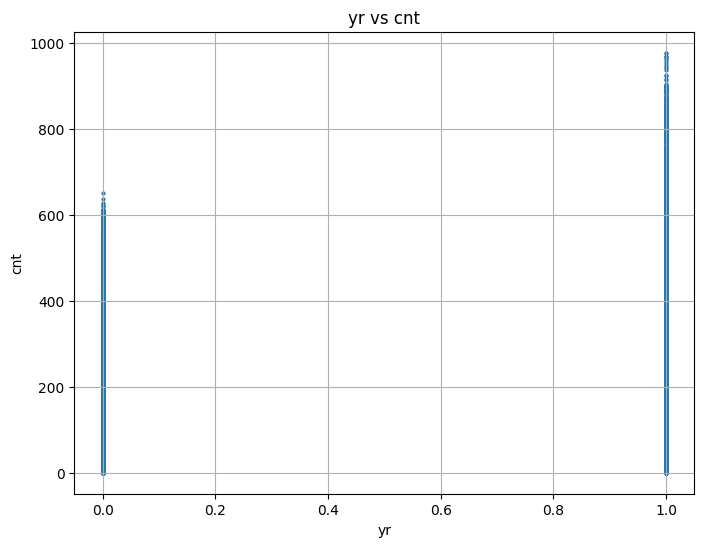

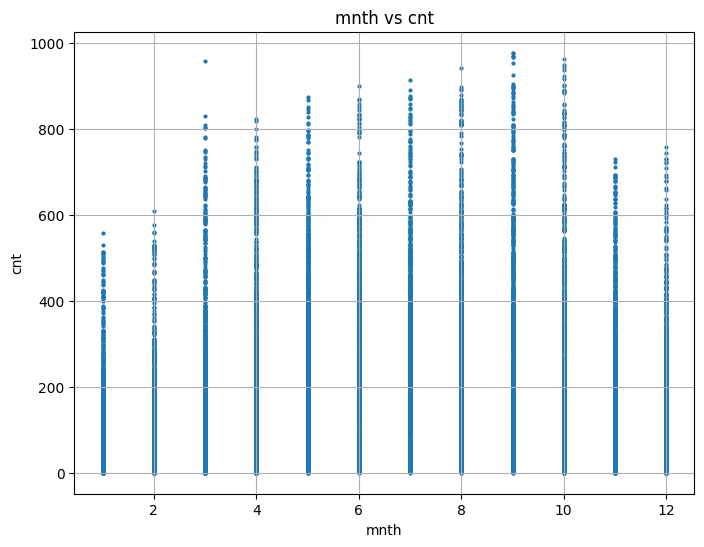

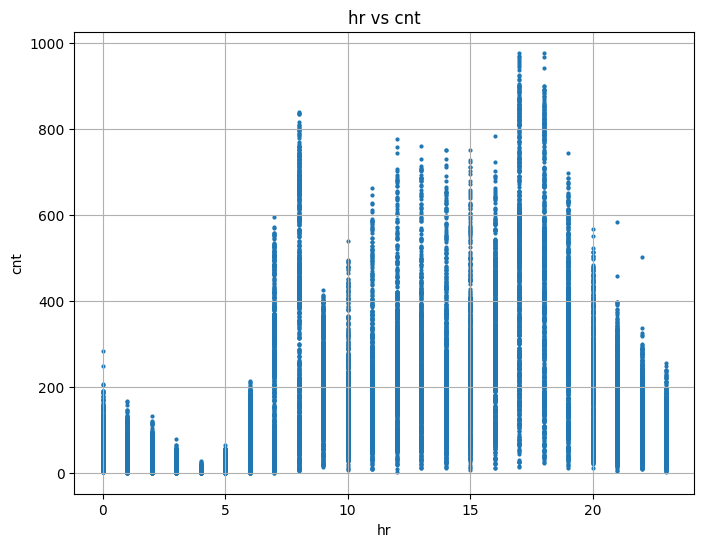

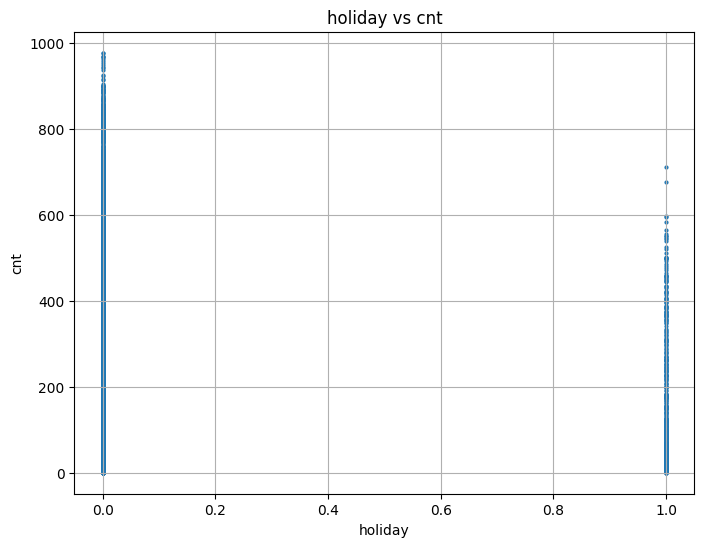

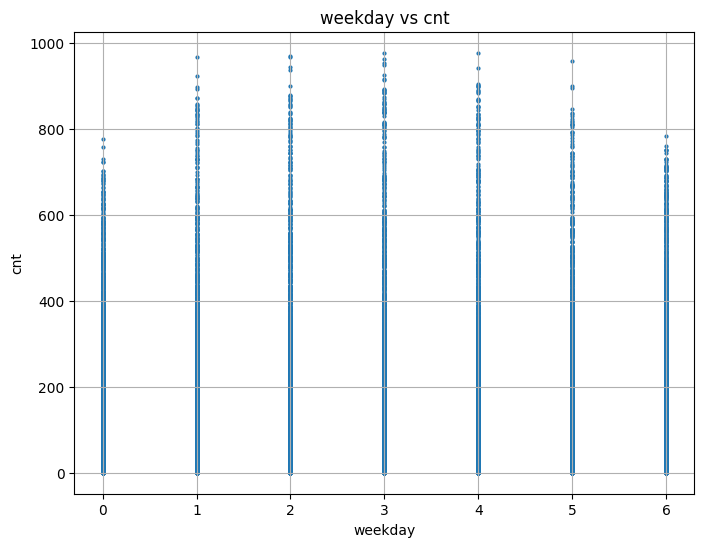

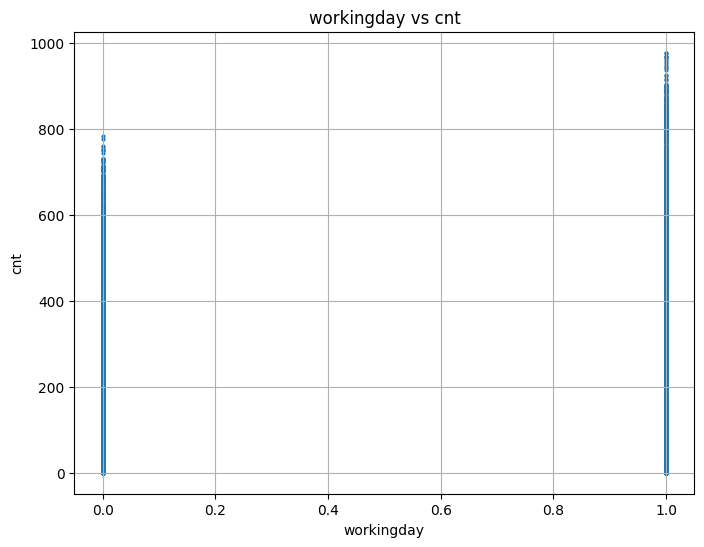

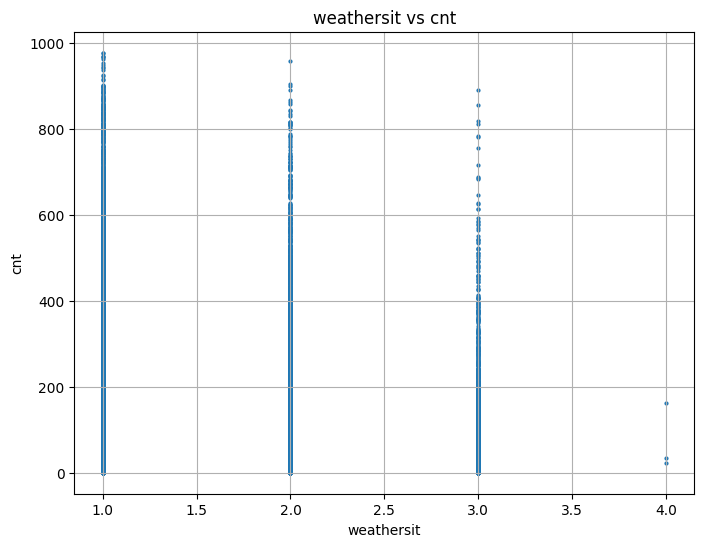

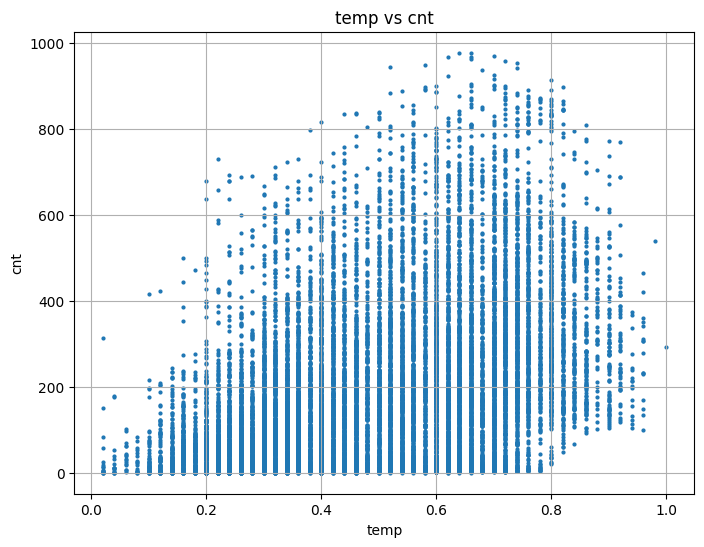

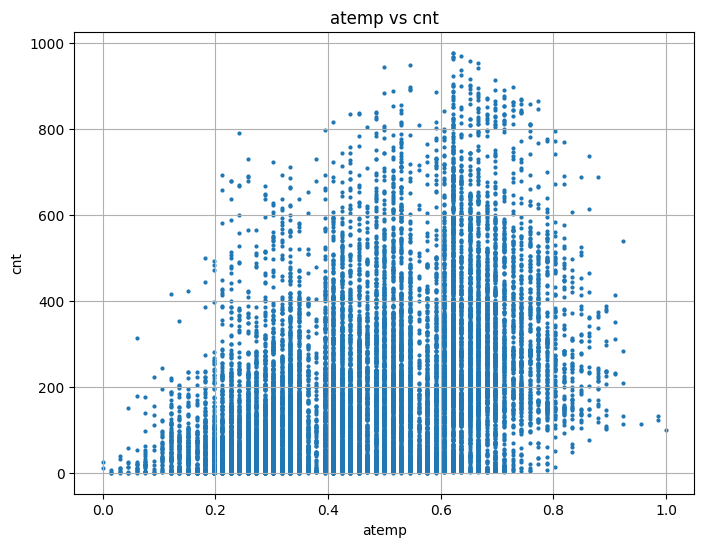

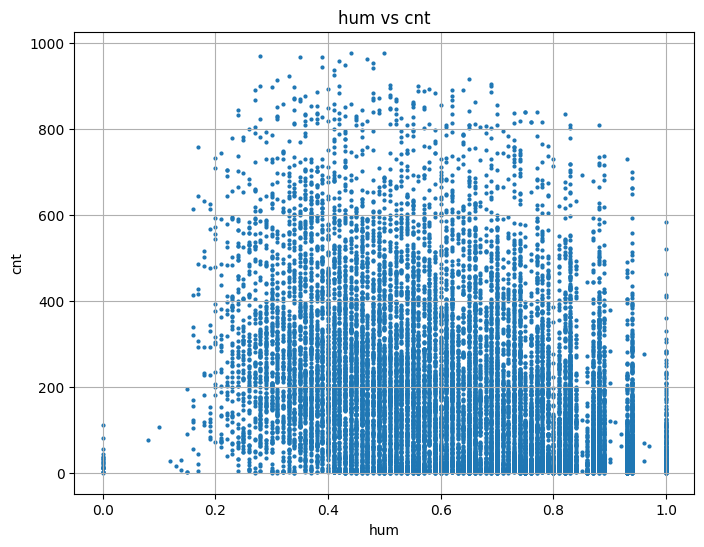

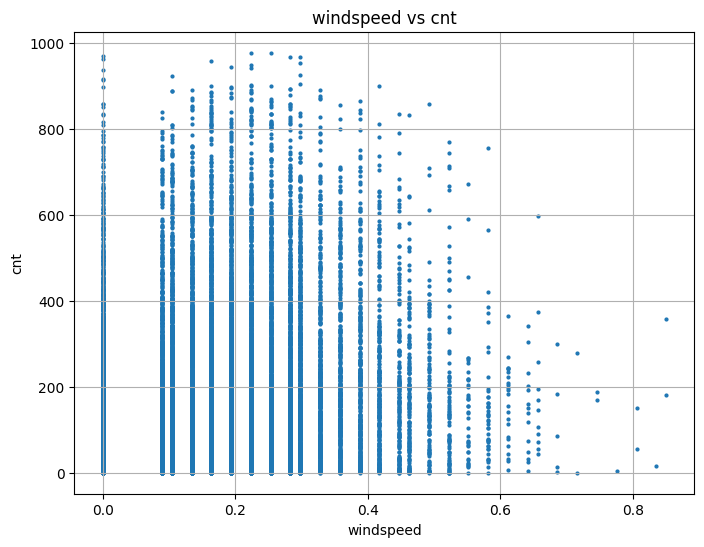

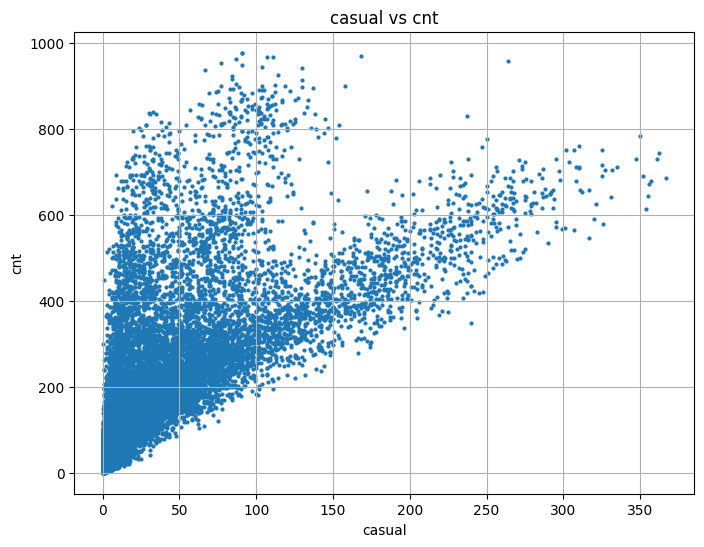

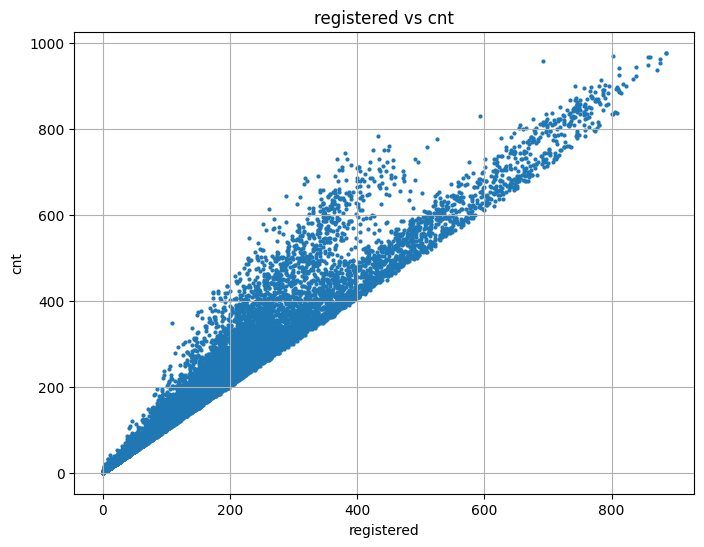

In [29]:
# There is too much data to establish a pair plot and a lot of attributes have obvious correlations anyways,
# for example, temp is going to be less in winter and more in summer.
# So lets just see how each attribute correlates to the number of bikes rented.

# Extract the 'cnt' column
cnt_column = df['cnt']

# Get the list of other attributes (excluding 'cnt' and 'dteday')
other_attributes = [col for col in df.columns if col != 'cnt' and col != 'dteday' and col != 'instant']

# Plot each attribute against 'cnt'
for attribute in other_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[attribute], cnt_column, s=4)
    plt.title(f"{attribute} vs cnt")
    plt.xlabel(attribute)
    plt.ylabel('cnt')
    plt.grid(True)
    plt.show()

okay, so what did we learn?

Firstly, some of these would be better as histograms, lets check out season in the next part of our analysis.

Interestingly hr vs count seems like a regular wave, the number of people renting bikes obviously going up and down with the sun, though there are notable irregular peaks likely corresponding to people going to and returning from work. This idea is supported by more people biking on working days.

Cnt vs registered, if 200 bikes are rented, at least 200 users must be registered, this creates a convenient lower bound that will hopefully be established by neural network.

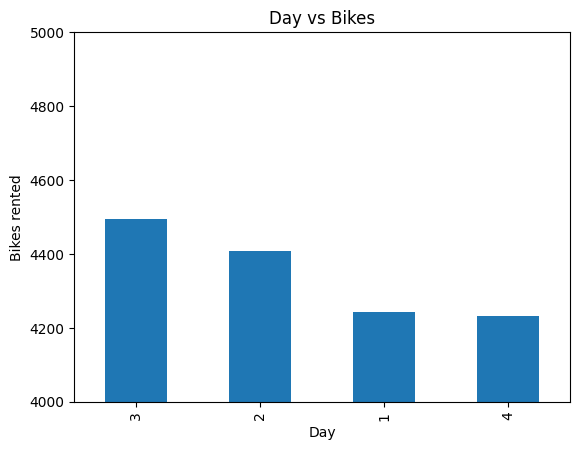

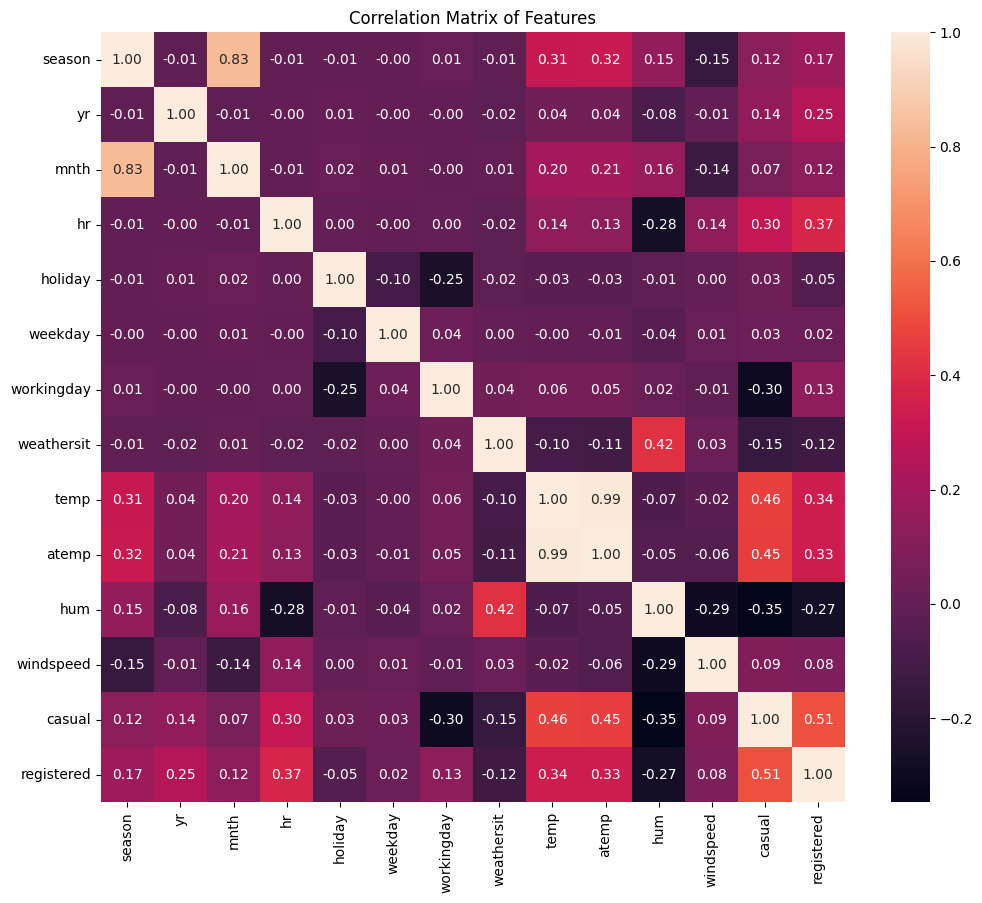

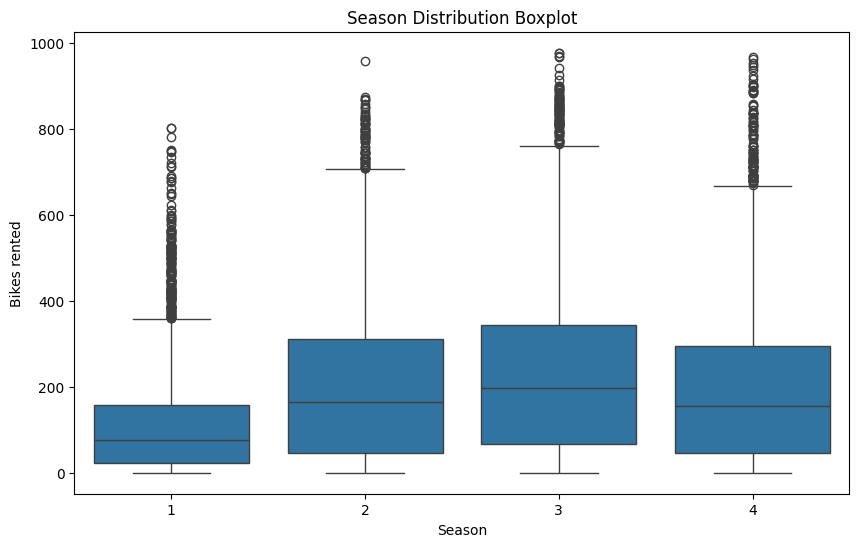

In [35]:

df['season'].value_counts().plot(kind='bar')
plt.title('Day vs Bikes')
plt.xlabel('Day')
plt.ylabel('Bikes rented')
plt.ylim(4000, 5000) #have to change the axis
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(columns=['cnt']).drop(columns=['instant']).drop(columns=['dteday']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation of Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Season Distribution Boxplot')
plt.xlabel('Season')
plt.ylabel('Bikes rented')
plt.show()



Day of week vs bikes isn't the best representation since it graphs *total* bikes rented on that day, but it does more clearly demonstrate that cetain days have more bikes rented. (Baring outliers which we don't really see on the original graph.)

As expected, there are some pretty heavy correlations between certain features of the data. Not much to be said about this, month correlates pretty strongly with season, no duh...

Anyway, the box plot is a lot more visually helpful in understanding bikes rented in each season. It helpfully shows outliers (which the network will have to deal with) and the quarter ranges.


Now that we have an idea of what the data looks like and some ideas on how the neural net will adapt to its shape, lets move on to the neural network.


#### 2-Layer Neural Net

In [36]:
# Perform train-dev-test split
df = pd.read_csv('hour.csv')

# input_data is the input data in the shape (m x n) aka (examples x features) 
# Dropping some irrelevant / ill formatted columns 
input_data = df.drop(columns=['cnt']).drop(columns=['instant']).drop(columns=['dteday']).values

# output_data is true/target values (number of bikes rented)
output_data = df['cnt'].values

# Normalize data
transformer = Normalizer(norm='max').fit(input_data)
input_data = transformer.transform(input_data)

# Normalizing 1D output data
highest_val = output_data.max()
lowest_val = output_data.min()
print("Range of bikes rented: ")
print("max: ", highest_val)
print("min", lowest_val)
output_data = (output_data - lowest_val) / (highest_val - lowest_val)
output_data = output_data.reshape(-1, 1)
# Scaling output so the sigmoid used will actually get the right answer.  
# When we care what the real answer is, just undo the normalization.

# Perform a train-dev-test split:
# Split dataset into training data and...
X_train, X_temp, Y_train, Y_temp = train_test_split(input_data, output_data, test_size=0.3, random_state=42)
# Split the remaining data into hyperparameter tuning data and testing data
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=37)


Range of bikes rented: 
max:  977
min 1


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import itertools

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = X_train.shape[1]  # Assuming input_data has features along columns
hidden_size1 = 64
hidden_size2 = 32
output_size = 1  # Assuming single output
learning_rates = [0.001, 0.01, 0.1]
num_epochs = [500, 1000, 1500]

best_val_loss = float('inf')
best_hyperparameters = None

# Convert input_data and output_data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

# Convert X_val and Y_val to PyTorch tensors for validation
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)

# Perform hyperparameter tuning
for lr, epochs in itertools.product(learning_rates, num_epochs):
    # Initialize the neural network
    model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

    # Define the loss function (Mean Squared Error)
    criterion = nn.MSELoss()

    # Define the optimizer (Gradient Descent)
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training the neural network
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Perform validation
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, Y_val_tensor)
        
    # Update best hyperparameters if validation loss is lower
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hyperparameters = {'learning_rate': lr, 'num_epochs': epochs}

print(f'Best hyperparameters: {best_hyperparameters}')
print(f'Best validation loss: {best_val_loss.item()}')


Best hyperparameters: {'learning_rate': 0.1, 'num_epochs': 1500}
Best validation loss: 0.009282485581934452


In [43]:
# Define tuned hyperparameters
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = Y_train.shape[1]
learning_rate = best_hyperparameters["learning_rate"]
num_epochs = best_hyperparameters["num_epochs"]

# Initialize the model
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert validation data to PyTorch tensors
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)

# Evaluate the model on the validation set
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, Y_val_tensor)
    print(f'Validation Loss: {val_loss.item():.4f}')

# Test the model
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, Y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [50/1500], Loss: 0.0468
Epoch [100/1500], Loss: 0.0347
Epoch [150/1500], Loss: 0.0334
Epoch [200/1500], Loss: 0.0327
Epoch [250/1500], Loss: 0.0321
Epoch [300/1500], Loss: 0.0315
Epoch [350/1500], Loss: 0.0309
Epoch [400/1500], Loss: 0.0304
Epoch [450/1500], Loss: 0.0298
Epoch [500/1500], Loss: 0.0292
Epoch [550/1500], Loss: 0.0287
Epoch [600/1500], Loss: 0.0281
Epoch [650/1500], Loss: 0.0276
Epoch [700/1500], Loss: 0.0270
Epoch [750/1500], Loss: 0.0264
Epoch [800/1500], Loss: 0.0259
Epoch [850/1500], Loss: 0.0253
Epoch [900/1500], Loss: 0.0247
Epoch [950/1500], Loss: 0.0242
Epoch [1000/1500], Loss: 0.0237
Epoch [1050/1500], Loss: 0.0232
Epoch [1100/1500], Loss: 0.0227
Epoch [1150/1500], Loss: 0.0222
Epoch [1200/1500], Loss: 0.0217
Epoch [1250/1500], Loss: 0.0212
Epoch [1300/1500], Loss: 0.0208
Epoch [1350/1500], Loss: 0.0203
Epoch [1400/1500], Loss: 0.0199
Epoch [1450/1500], Loss: 0.0195
Epoch [1500/1500], Loss: 0.0190
Validation Loss: 0.0174
Test Loss: 0.0187
